### Task 1. 시계열 혼잡도 분석

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import folium


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

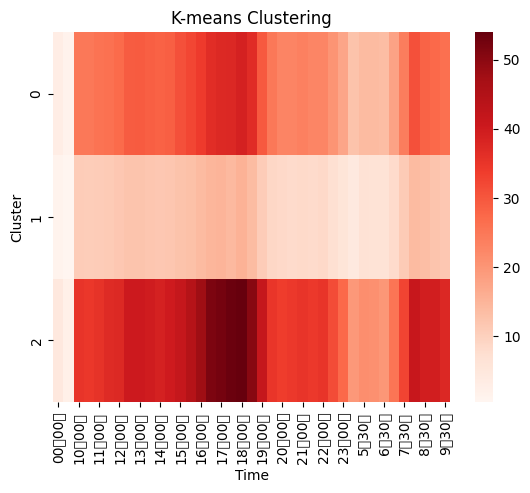

         출발역  cluster
0       가락시장        0
1    가산디지털단지        2
2         강남        2
3       강남구청        2
4     강동(마천)        1
..       ...      ...
238       홍제        0
239       화곡        0
240      화랑대        1
241       회현        2
242    효창공원앞        0

[243 rows x 2 columns]


In [3]:

# 혼잡도 데이터 로딩
df = pd.read_csv(r'C:\Users\user\Downloads\서울교통공사_지하철혼잡도정보_20231231.csv', encoding='cp949')

# 시간대별 혼잡도 피벗 테이블 생성
df_pivot = df.pivot_table(index='출발역', values=df.columns[6:], aggfunc='mean')
df_pivot = df_pivot.dropna()

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pivot)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_pivot['cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터별 혼잡도 평균 시각화
sns.heatmap(df_pivot.groupby('cluster').mean(), cmap="Reds")
plt.title("K-means Clustering")
plt.xlabel("Time")
plt.ylabel("Cluster")
plt.show()

# 클러스터 결과 확인
df_result = df_pivot.reset_index()[['출발역', 'cluster']]
print(df_result)


### Task 2. 혼잡도, 승차, 하차 히트맵 시각화

In [13]:
dongdaemun_stations = ['청량리', '제기동', '신설동', '동묘앞', '용두', '창신']


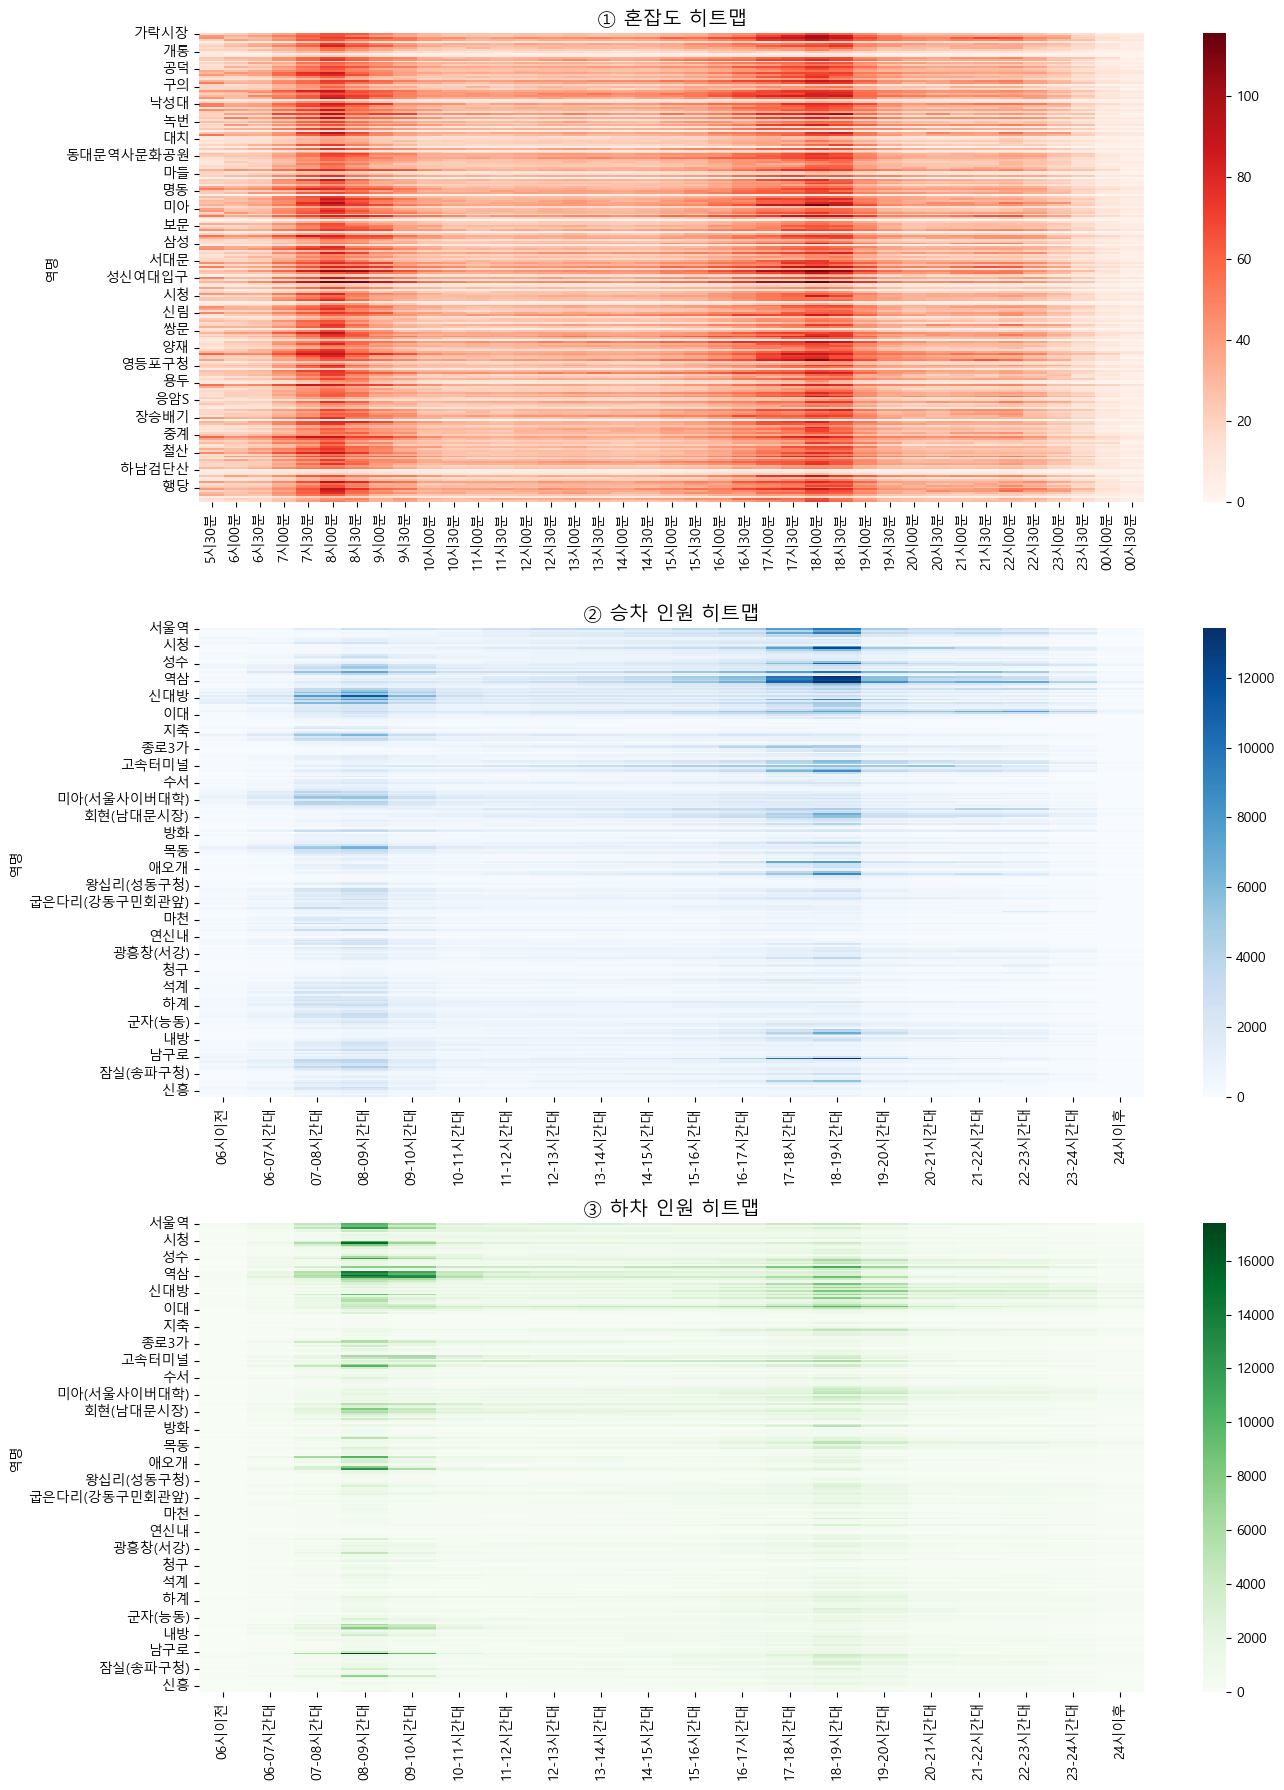

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 1. Load Data
df_passenger = pd.read_csv(r'C:\Users\user\Downloads\서울교통공사_역별 시간대별 승하차인원(23.1~23.12).csv', encoding='cp949')
df_congestion = pd.read_csv(r'C:\Users\user\Downloads\서울교통공사_지하철혼잡도정보_20231231.csv', encoding='cp949')

# 컬럼명 변환
df_passenger = df_passenger.rename(columns={'역명': '역명', '승하차구분': '구분', '수송일자': '일자'})
df_congestion = df_congestion.rename(columns={'출발역': '역명', '요일구분': '요일'})

# 날짜 필터
df_board = df_passenger[(df_passenger['구분'] == '승차') & (df_passenger['일자'] == '2023-12-01')]
df_alight = df_passenger[(df_passenger['구분'] == '하차') & (df_passenger['일자'] == '2023-12-01')]

# 시간대 컬럼 추출
time_cols = [col for col in df_board.columns if '시간대' in col or '이전' in col or '이후' in col]
pivot_board = df_board.set_index('역명')[time_cols]
pivot_alight = df_alight.set_index('역명')[time_cols]

# 혼잡도 시간대 피벗
time_cols_cong = df_congestion.columns[6:]
pivot_cong = df_congestion[df_congestion['요일'] == '평일'].groupby('역명')[time_cols_cong].mean()

# 시각화
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

sns.heatmap(pivot_cong, cmap='Reds', ax=axes[0])
axes[0].set_title("① 혼잡도 히트맵", fontsize=14)

sns.heatmap(pivot_board, cmap='Blues', ax=axes[1])
axes[1].set_title("② 승차 인원 히트맵", fontsize=14)

sns.heatmap(pivot_alight, cmap='Greens', ax=axes[2])
axes[2].set_title("③ 하차 인원 히트맵", fontsize=14)

plt.tight_layout()
plt.show()

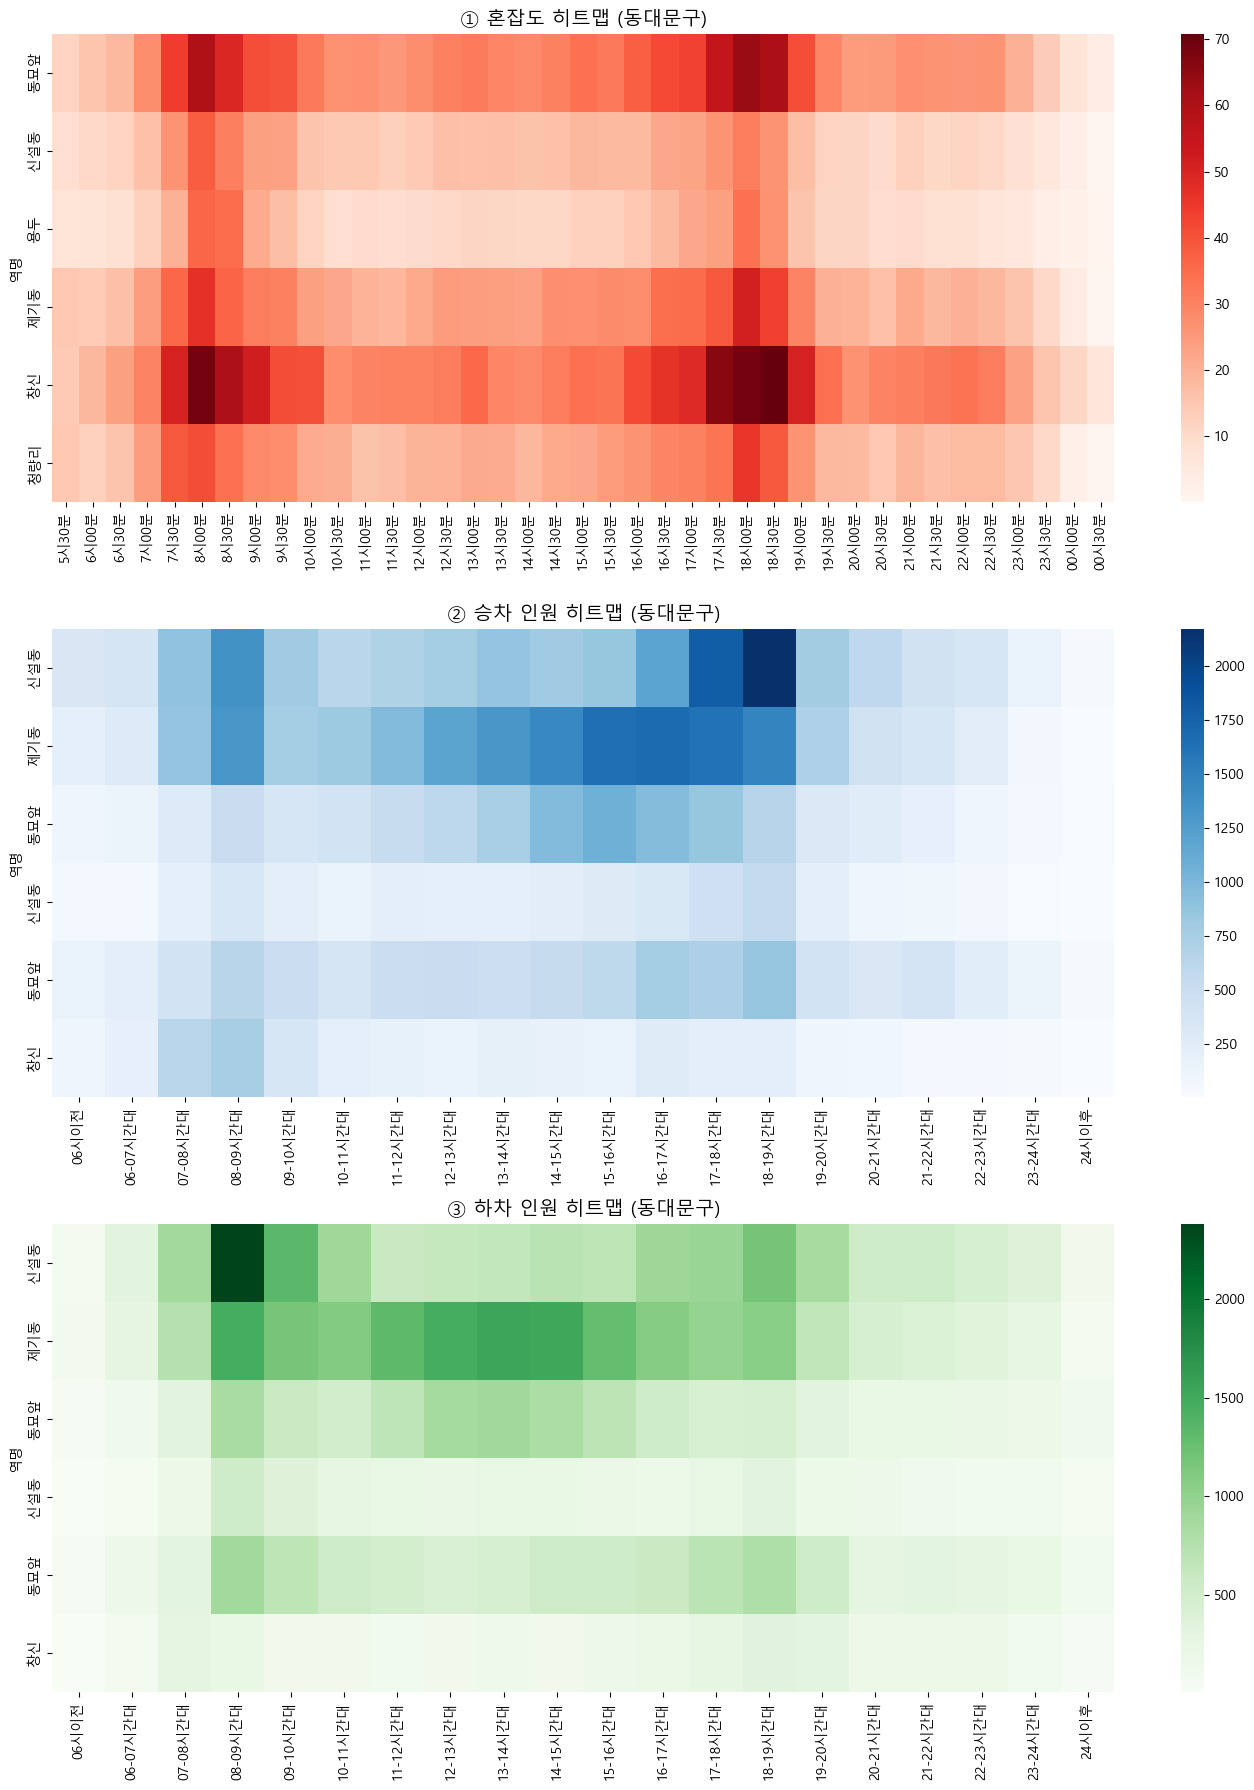

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#  동대문구 지하철역 리스트
dongdaemun_stations = ['청량리', '제기동', '신설동', '동묘앞', '용두', '창신']

#  데이터 불러오기
df_passenger = pd.read_csv(r'C:\Users\user\Downloads\서울교통공사_역별 시간대별 승하차인원(23.1~23.12).csv', encoding='cp949')
df_congestion = pd.read_csv(r'C:\Users\user\Downloads\서울교통공사_지하철혼잡도정보_20231231.csv', encoding='cp949')

#  컬럼명 변환
df_passenger = df_passenger.rename(columns={'역명': '역명', '승하차구분': '구분', '수송일자': '일자'})
df_congestion = df_congestion.rename(columns={'출발역': '역명', '요일구분': '요일'})

#  동대문구 역만 필터링
df_passenger = df_passenger[df_passenger['역명'].isin(dongdaemun_stations)]
df_congestion = df_congestion[df_congestion['역명'].isin(dongdaemun_stations)]

#  날짜 필터 (예: 2023-12-01)
df_board = df_passenger[(df_passenger['구분'] == '승차') & (df_passenger['일자'] == '2023-12-01')]
df_alight = df_passenger[(df_passenger['구분'] == '하차') & (df_passenger['일자'] == '2023-12-01')]

#  시간대 컬럼 추출
time_cols = [col for col in df_board.columns if '시간대' in col or '이전' in col or '이후' in col]
pivot_board = df_board.set_index('역명')[time_cols]
pivot_alight = df_alight.set_index('역명')[time_cols]

#  혼잡도 시간대 피벗
time_cols_cong = df_congestion.columns[6:]
pivot_cong = df_congestion[df_congestion['요일'] == '평일'].groupby('역명')[time_cols_cong].mean()

#  시각화
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

sns.heatmap(pivot_cong, cmap='Reds', ax=axes[0])
axes[0].set_title("① 혼잡도 히트맵 (동대문구)", fontsize=14)

sns.heatmap(pivot_board, cmap='Blues', ax=axes[1])
axes[1].set_title("② 승차 인원 히트맵 (동대문구)", fontsize=14)

sns.heatmap(pivot_alight, cmap='Greens', ax=axes[2])
axes[2].set_title("③ 하차 인원 히트맵 (동대문구)", fontsize=14)

plt.tight_layout()
plt.show()
